In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing


In [2]:
data = pd.read_csv("1900_2021_DISASTERS.xlsx - emdat data.csv")

In [3]:
missing_values = data.isna().sum()
print(missing_values)

Year                              0
Seq                               0
Glide                         14545
Disaster Group                    0
Disaster Subgroup                 0
Disaster Type                     0
Disaster Subtype               3110
Disaster Subsubtype           15049
Event Name                    12265
Country                           0
ISO                               0
Region                            0
Continent                         0
Location                       1792
Origin                        12332
Associated Dis                12778
Associated Dis2               15419
OFDA Response                 14432
Appeal                        13557
Declaration                   12870
Aid Contribution              15449
Dis Mag Value                 11180
Dis Mag Scale                  1190
Latitude                      13397
Longitude                     13394
Local Time                    15023
River Basin                   14839
Start Year                  

In [4]:
print("Disaster.Subgroup:")
print(data['Disaster Subgroup'].unique())

print("Disaster.Type:")
print(data['Disaster Type'].unique())

print("Disaster.Subtype:")
print(data['Disaster Subtype'].unique())

print("Disaster.Subsubtype:")
print(data['Disaster Subsubtype'].unique())

print("Continent:")
print(data['Continent'].unique())

print("Region:")
print(data['Region'].unique())

Disaster.Subgroup:
['Climatological' 'Geophysical' 'Meteorological' 'Hydrological'
 'Biological' 'Extra-terrestrial']
Disaster.Type:
['Drought' 'Earthquake' 'Volcanic activity' 'Mass movement (dry)' 'Storm'
 'Flood' 'Epidemic' 'Landslide' 'Wildfire' 'Extreme temperature ' 'Fog'
 'Insect infestation' 'Impact' 'Animal accident' 'Glacial lake outburst']
Disaster.Subtype:
['Drought' 'Ground movement' 'Ash fall' 'Rockfall' 'Tropical cyclone' nan
 'Bacterial disease' 'Landslide' 'Avalanche' 'Forest fire'
 'Riverine flood' 'Convective storm' 'Viral disease' 'Mudslide' 'Tsunami'
 'Heat wave' 'Land fire (Brush, Bush, Pasture)' 'Coastal flood'
 'Cold wave' 'Flash flood' 'Parasitic disease' 'Locust'
 'Severe winter conditions' 'Grasshopper' 'Subsidence'
 'Extra-tropical storm' 'Lava flow' 'Pyroclastic flow ']
Disaster.Subsubtype:
[nan 'Tornado' 'Hail' 'Severe storm' 'Winter storm/Blizzard'
 'Lightning/Thunderstorms' 'Mudslide' 'Sand/Dust storm'
 'Sudden subsidence' 'Snow/Ice' 'Rain' 'Storm/Surge'

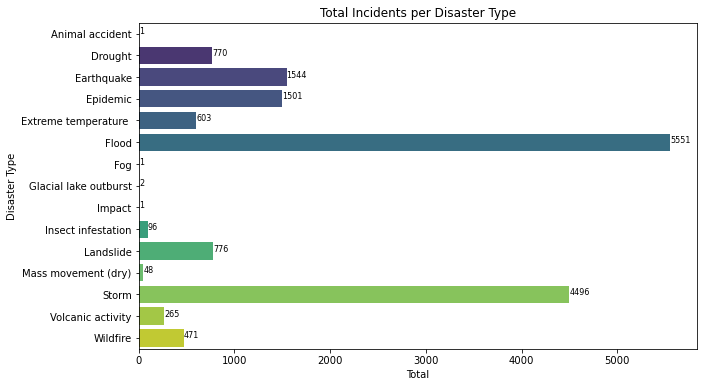

In [46]:
df = data.groupby('Disaster Type').size().reset_index(name='total')

df['Disaster Type'] = df['Disaster Type'].astype('category')
df['Disaster Type'] = df['Disaster Type'].cat.reorder_categories(df.sort_values('total')['Disaster Type'], ordered=True)

# Plotting
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=df, y='Disaster Type', x='total', palette='viridis')

for index, row in df.iterrows():
    barplot.text(row.total, index, row.total, color='black', ha="left", size=8)

plt.xlabel('Total')
plt.ylabel('Disaster Type')
plt.title('Total Incidents per Disaster Type')
plt.legend([],[], frameon=False)  
plt.show()

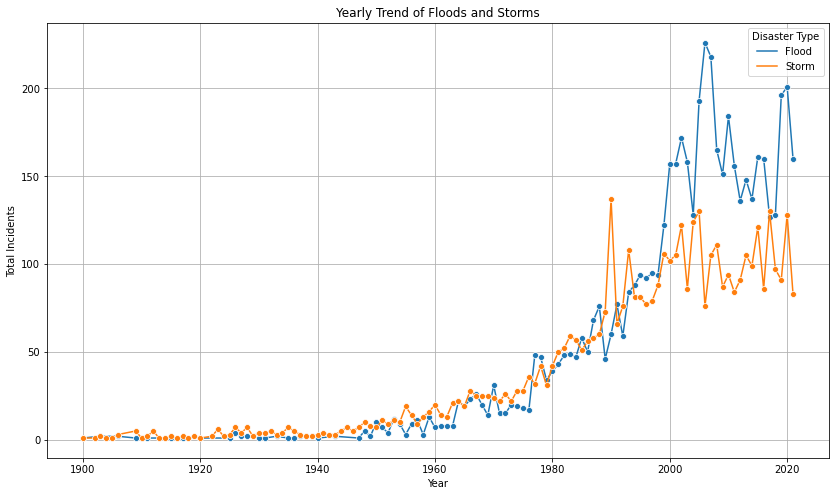

In [6]:

filtered_data = data[data['Disaster Type'].isin(['Flood', 'Storm'])]


grouped_data = filtered_data.groupby(['Disaster Type', 'Year']).size().reset_index(name='total')


plt.figure(figsize=(14, 8))
sns.lineplot(data=grouped_data, x='Year', y='total', hue='Disaster Type', marker='o')

plt.xlabel('Year')
plt.ylabel('Total Incidents')
plt.title('Yearly Trend of Floods and Storms')
plt.legend(title='Disaster Type')
plt.grid(True)
plt.show()

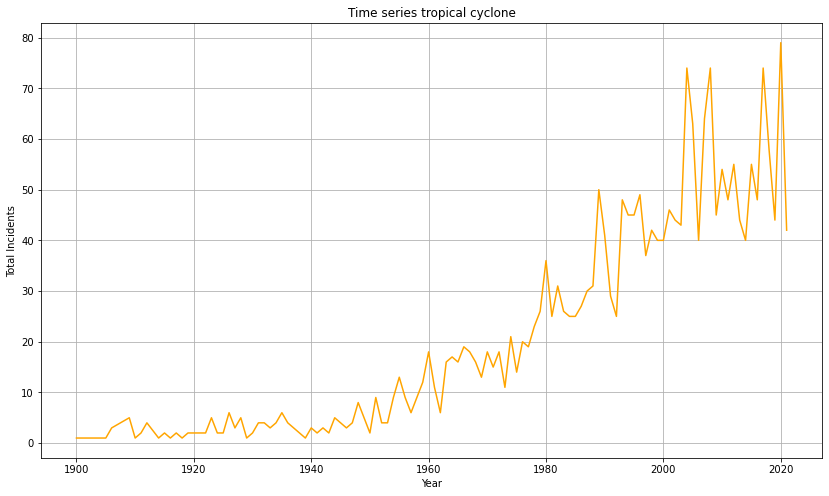

In [7]:

filtered_data = data[data['Disaster Subtype'] == 'Tropical cyclone']


grouped_data = filtered_data.groupby('Year').size().reset_index(name='total')


plt.figure(figsize=(14, 8))
sns.lineplot(data=grouped_data, x='Year', y='total', color='orange')

plt.xlabel('Year')
plt.ylabel('Total Incidents')
plt.title('Time series tropical cyclone')
plt.grid(True)
plt.show()

In [11]:
def view_disaster_per_continent(disaster, data):
    df = data[data['Disaster Type'] == disaster].groupby('Continent').size().reset_index(name='total').sort_values(by='total', ascending=False)
    

    print(df)
    
 
    df_yearly = data[data['Disaster Type'] == disaster].groupby(['Continent', 'Year']).size().reset_index(name='total')
    

    plt.figure(figsize=(14, 8))
    sns.lineplot(data=df_yearly, x='Year', y='total', hue='Continent')
    plt.title(disaster)
    plt.xlabel('Year')
    plt.ylabel('Total Incidents')
    plt.legend(title='Continent')
    plt.grid(True)
    plt.show()

  Continent  total
2      Asia   2303
1  Americas   1275
0    Africa   1147
3    Europe    668
4   Oceania    158


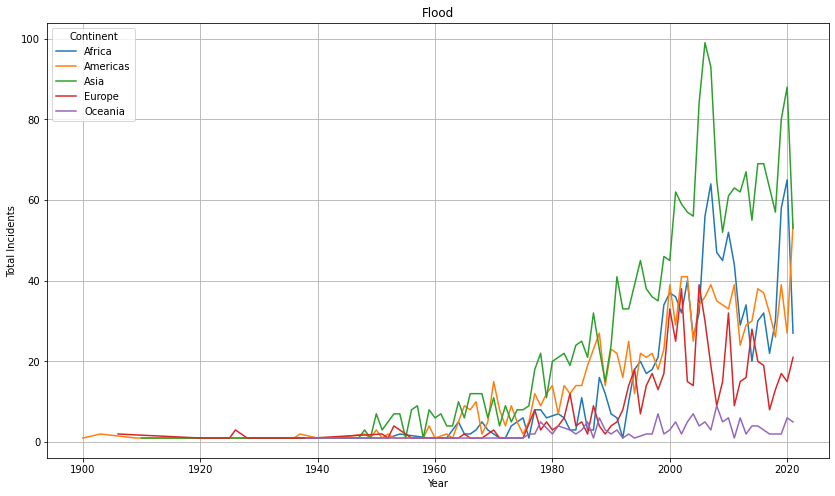

In [13]:
view_disaster_per_continent('Flood', data)

  Continent  total
2      Asia   1884
1  Americas   1442
3    Europe    542
4   Oceania    338
0    Africa    290


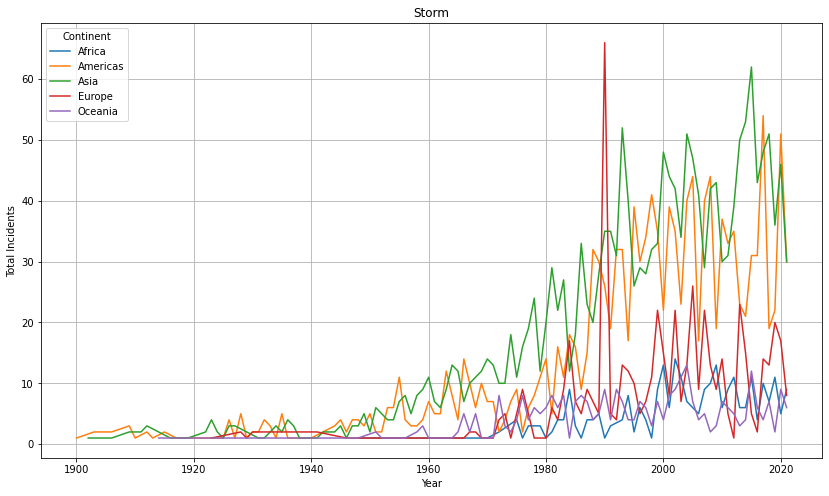

In [14]:
view_disaster_per_continent('Storm', data)

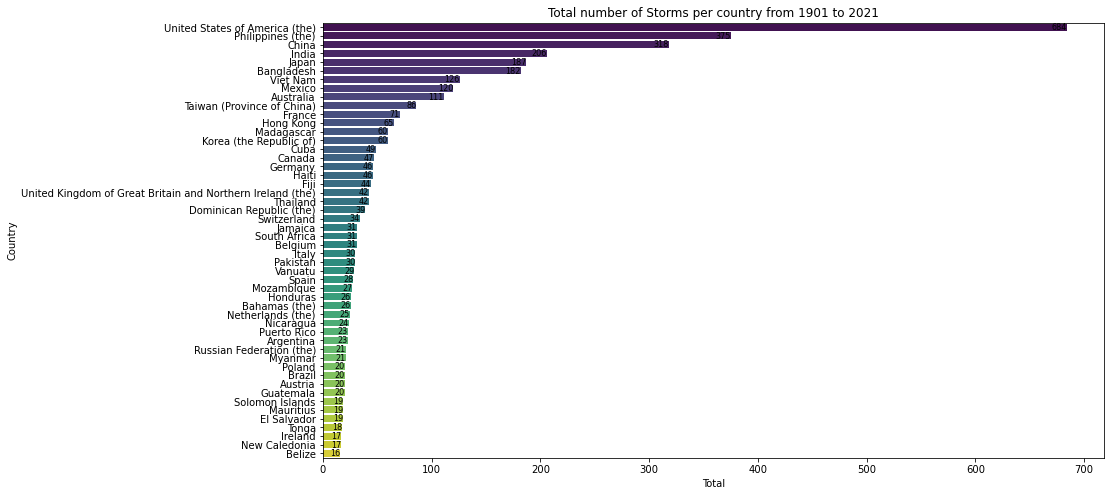

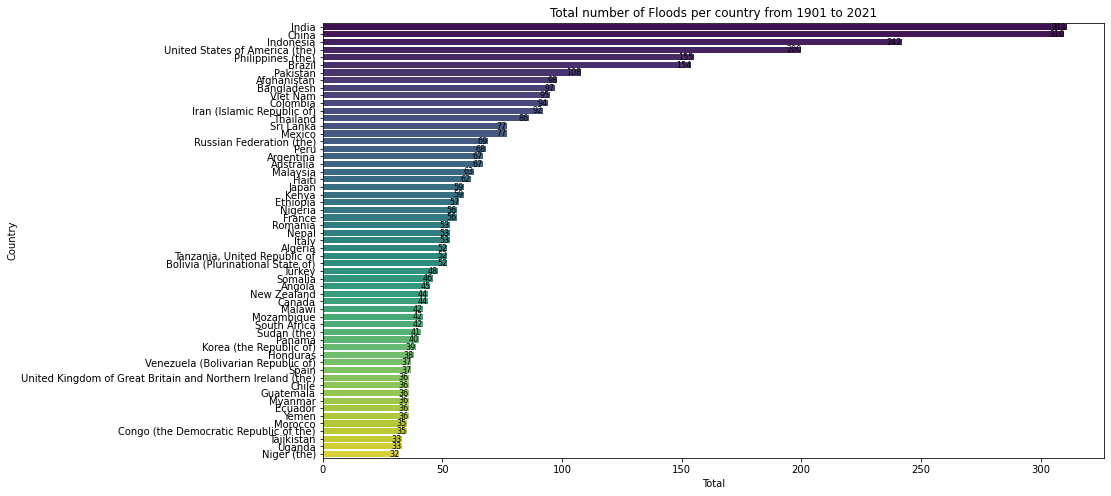

In [18]:
storm_df = data[data['Disaster Type'] == 'Storm'].groupby('Country').size().reset_index(name='total')


storm_filtered = storm_df[storm_df['total'] > 15]
storm_filtered = storm_filtered.sort_values(by='total', ascending=False)

plt.figure(figsize=(14, 8))
sns.barplot(x='total', y='Country', data=storm_filtered, palette='viridis')
plt.title('Total number of Storms per country from 1901 to 2021')
plt.xlabel('Total')
plt.ylabel('Country')
for index, value in enumerate(storm_filtered['total']):
    plt.text(value, index, str(value), va='center', ha='right', size=8, color='black')
plt.show()


flood_df = data[data['Disaster Type'] == 'Flood'].groupby('Country').size().reset_index(name='total')


flood_filtered = flood_df[flood_df['total'] > 30]
flood_filtered = flood_filtered.sort_values(by='total', ascending=False)

plt.figure(figsize=(14, 8))
sns.barplot(x='total', y='Country', data=flood_filtered, palette='viridis')
plt.title('Total number of Floods per country from 1901 to 2021')
plt.xlabel('Total')
plt.ylabel('Country')
for index, value in enumerate(flood_filtered['total']):
    plt.text(value, index, str(value), va='center', ha='right', size=8, color='black')
plt.show()

In [22]:
from statsmodels.tsa.stattools import adfuller



dis = data[data['Disaster Type'] == 'Storm'].groupby('Year').size().reset_index(name='total')

train = dis['total'].iloc[1:105]
test = dis['total'].iloc[106:118]

train_ts = pd.Series(train.values, index=pd.date_range(start=dis['Year'].iloc[0], periods=len(train), freq='Y'))
test_ts = pd.Series(test.values, index=pd.date_range(start=dis['Year'].iloc[105], periods=len(test), freq='Y'))


print(train_ts)
print(test_ts)

1970-12-31 00:00:00.000001900      1
1971-12-31 00:00:00.000001900      2
1972-12-31 00:00:00.000001900      1
1973-12-31 00:00:00.000001900      1
1974-12-31 00:00:00.000001900      3
                                ... 
2069-12-31 00:00:00.000001900    124
2070-12-31 00:00:00.000001900    130
2071-12-31 00:00:00.000001900     76
2072-12-31 00:00:00.000001900    105
2073-12-31 00:00:00.000001900    111
Freq: A-DEC, Length: 104, dtype: int64
1970-12-31 00:00:00.000002009     94
1971-12-31 00:00:00.000002009     84
1972-12-31 00:00:00.000002009     91
1973-12-31 00:00:00.000002009    105
1974-12-31 00:00:00.000002009     99
1975-12-31 00:00:00.000002009    121
1976-12-31 00:00:00.000002009     86
1977-12-31 00:00:00.000002009    130
1978-12-31 00:00:00.000002009     97
1979-12-31 00:00:00.000002009     91
1980-12-31 00:00:00.000002009    128
1981-12-31 00:00:00.000002009     83
Freq: A-DEC, dtype: int64


In [20]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np



model = ExponentialSmoothing(train, seasonal=None, trend='additive', seasonal_periods=12).fit()


fc_ets = model.forecast(12)


mse = mean_squared_error(test[:12], fc_ets)
mae = mean_absolute_error(test[:12], fc_ets)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((test[:12] - fc_ets) / test[:12])) * 100


accuracy_metrics = {
    'MSE': mse,
    'MAE': mae,
    'RMSE': rmse,
    'MAPE': mape
}

print(accuracy_metrics)

{'MSE': 788.1793827075813, 'MAE': 24.573058822758725, 'RMSE': 28.074532635603774, 'MAPE': 26.61083131573235}


In [24]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [25]:
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np


ar_model = auto_arima(train, seasonal=False, stepwise=True, trace=True)


fc_arima = ar_model.predict(n_periods=12)


mse = mean_squared_error(test[:12], fc_arima)
mae = mean_absolute_error(test[:12], fc_arima)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((test[:12] - fc_arima) / test[:12])) * 100


accuracy_metrics = {
    'MSE': mse,
    'MAE': mae,
    'RMSE': rmse,
    'MAPE': mape
}

print(accuracy_metrics)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=783.069, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=837.136, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=816.068, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=792.378, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=835.750, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=792.699, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=781.825, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=793.571, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=779.898, Time=0.04 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=781.845, Time=0.04 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=783.380, Time=0.12 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=782.526, Time=0.02 sec

Best model:  ARIMA(2,1,0)(0,0,0)[0] intercept
Total fit time: 0.531 seconds
{'MSE': 295.91190903256626, 'MAE': 15.317717626349108, 'RMSE': 17.202090251843416, 'MAPE': 14.968671

In [32]:
def forecast_disaster(Disaster):

    dis = data[data['Disaster Type'] == Disaster].groupby('Year').size().reset_index(name='total')
    
  
    serie = dis['total']
    
   
    ar_model = auto_arima(serie, seasonal=False, stepwise=True, trace=True)
    
   
    n_periods = 10
    fore = ar_model.predict(n_periods=n_periods, return_conf_int=True)
    
    
    plt.figure(figsize=(10, 6))
    plt.plot(serie, label='Historical')
    plt.plot(range(len(serie), len(serie) + n_periods), fore[0], label='Previsão')
    plt.fill_between(range(len(serie), len(serie) + n_periods), 
                     fore[1][:, 0], fore[1][:, 1], color='pink', alpha=0.3)
    plt.legend()
    plt.title(f"Previsão {Disaster}")
    plt.show()
    
  
    year = np.arange(2022, 2022 + n_periods)
    df_pred = pd.DataFrame({
        'year': year,
        'forecast': fore[0],
        'lower_conf_int': fore[1][:, 0],
        'upper_conf_int': fore[1][:, 1]
    })
    
    print(f"Forecasting {Disaster}\n")
    return df_pred

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=806.413, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=827.113, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=828.887, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=826.384, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=826.028, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=806.800, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=806.068, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=822.308, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=804.439, Time=0.03 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=806.217, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=808.029, Time=0.09 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=805.832, Time=0.02 sec

Best model:  ARIMA(2,1,0)(0,0,0)[0] intercept
Total fit time: 0.497 seconds


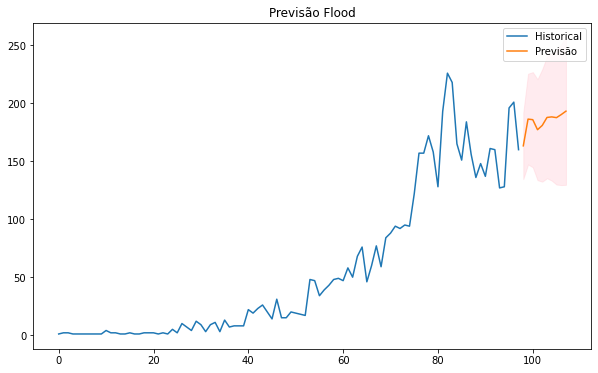

Forecasting Flood



,year,forecast,lower_conf_int,upper_conf_int
98,2022,163.307894,134.622571,191.993216
99,2023,186.372875,147.251370,225.494380
100,2024,185.872173,144.824830,226.919516
101,2025,177.215217,133.683407,220.747027
102,2026,180.921116,132.402062,229.440170
103,2027,187.802775,135.365633,240.239916
104,2028,188.278855,133.295336,243.262375
105,2029,187.634045,129.917535,245.350555
106,2030,190.270058,129.459617,251.080498
107,2031,193.227600,129.657059,256.798141


In [33]:
forecast_disaster("Flood")

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=905.960, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=980.531, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=943.706, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=920.884, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=978.764, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=921.883, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=906.200, Time=0.06 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=907.840, Time=0.13 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=907.849, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=918.401, Time=0.03 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=912.088, Time=0.08 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=906.637, Time=0.13 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=909.826, Time=0.16 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=908.328, Time=0.04 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0] intercept


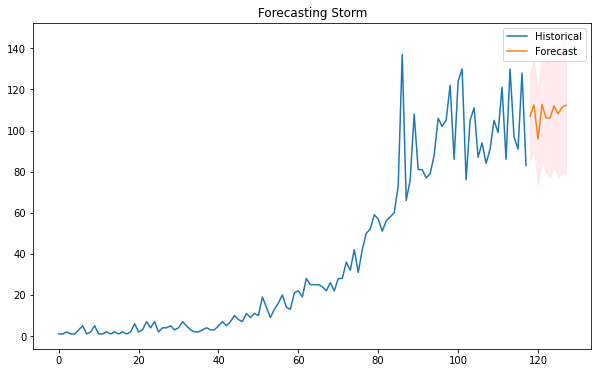

Forecasting Storm



,year,forecast,lower_conf_int,upper_conf_int
118,2022,106.960766,85.436065,128.485468
119,2023,112.416065,90.458605,134.373525
120,2024,95.828717,73.273213,118.384222
121,2025,112.633023,86.245392,139.020655
122,2026,106.249932,79.524497,132.975367
123,2027,106.074006,77.693238,134.454775
124,2028,112.031836,82.223057,141.840615
125,2029,108.119187,77.573902,138.664472
126,2030,111.269653,79.284175,143.255131
127,2031,112.364701,79.430041,145.299362


In [28]:
forecast_disaster("Storm")

In [31]:
data.to_excel('desastres1.xlsx')